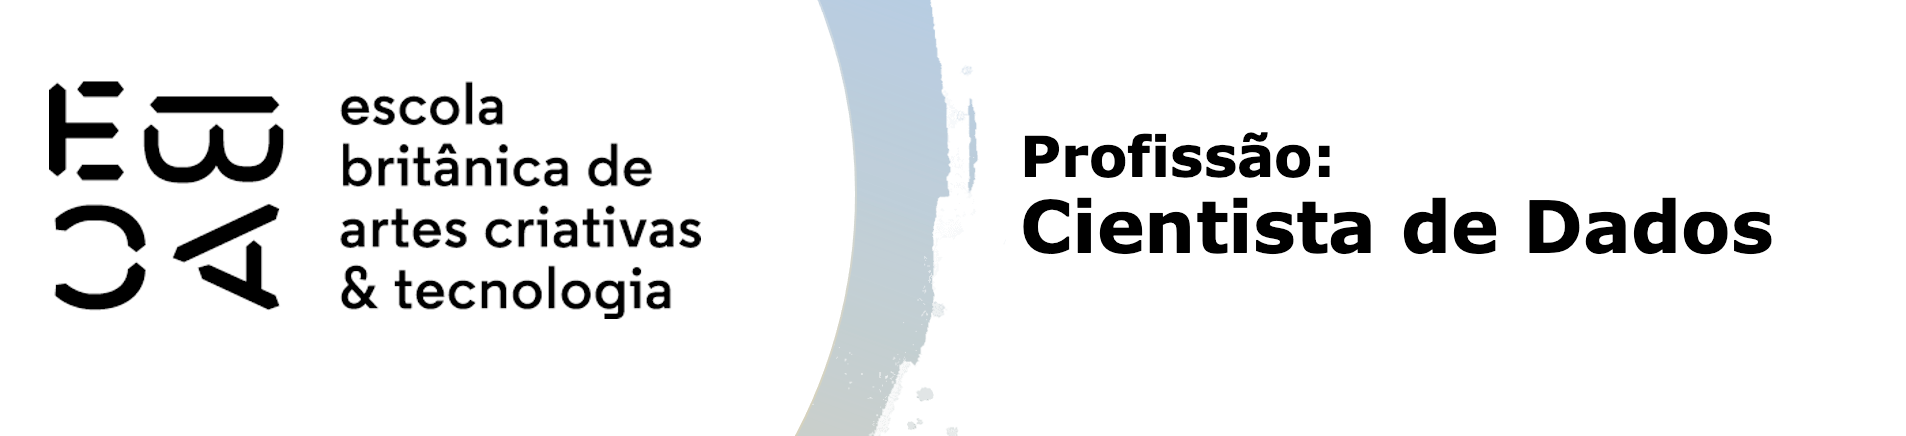

# Tarefa - Agrupamento hierárquico

Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?" 

Nosso objetivo agora é agrupar as sessões de acesso ao portal considerando o comportamento de acesso e informações da data, como a proximidade a uma data especial, fim de semana e o mês.

|Variavel                |Descrição          | 
|------------------------|:-------------------| 
|Administrative          | Quantidade de acessos em páginas administrativas| 
|Administrative_Duration | Tempo de acesso em páginas administrativas | 
|Informational           | Quantidade de acessos em páginas informativas  | 
|Informational_Duration  | Tempo de acesso em páginas informativas  | 
|ProductRelated          | Quantidade de acessos em páginas de produtos | 
|ProductRelated_Duration | Tempo de acesso em páginas de produtos | 
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  | 
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações | 
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico | 
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) | 
|Month                   | Mês  | 
|OperatingSystems        | Sistema operacional do visitante | 
|Browser                 | Browser do visitante | 
|Region                  | Região | 
|TrafficType             | Tipo de tráfego                  | 
|VisitorType             | Tipo de visitante: novo ou recorrente | 
|Weekend                 | Indica final de semana | 
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster

In [2]:
df = pd.read_csv('online_shoppers_intention.csv')

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
df.Revenue.value_counts(dropna=False)

Revenue
False    10422
True      1908
Name: count, dtype: int64

## Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

In [5]:
variaveis_escopo = [
    'Administrative', 'Administrative_Duration',
    'Informational', 'Informational_Duration',
    'ProductRelated', 'ProductRelated_Duration',
    'BounceRates', 'ExitRates', 'PageValues',
    'SpecialDay', 'Month', 'Weekend', 'Revenue'
]

print(df[variaveis_escopo].describe(include='all'))

        Administrative  Administrative_Duration  Informational  \
count     12330.000000             12330.000000   12330.000000   
unique             NaN                      NaN            NaN   
top                NaN                      NaN            NaN   
freq               NaN                      NaN            NaN   
mean          2.315166                80.818611       0.503569   
std           3.321784               176.779107       1.270156   
min           0.000000                 0.000000       0.000000   
25%           0.000000                 0.000000       0.000000   
50%           1.000000                 7.500000       0.000000   
75%           4.000000                93.256250       0.000000   
max          27.000000              3398.750000      24.000000   

        Informational_Duration  ProductRelated  ProductRelated_Duration  \
count             12330.000000    12330.000000             12330.000000   
unique                     NaN             NaN           

In [6]:
print(df[variaveis_escopo].isnull().sum())

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
Weekend                    0
Revenue                    0
dtype: int64


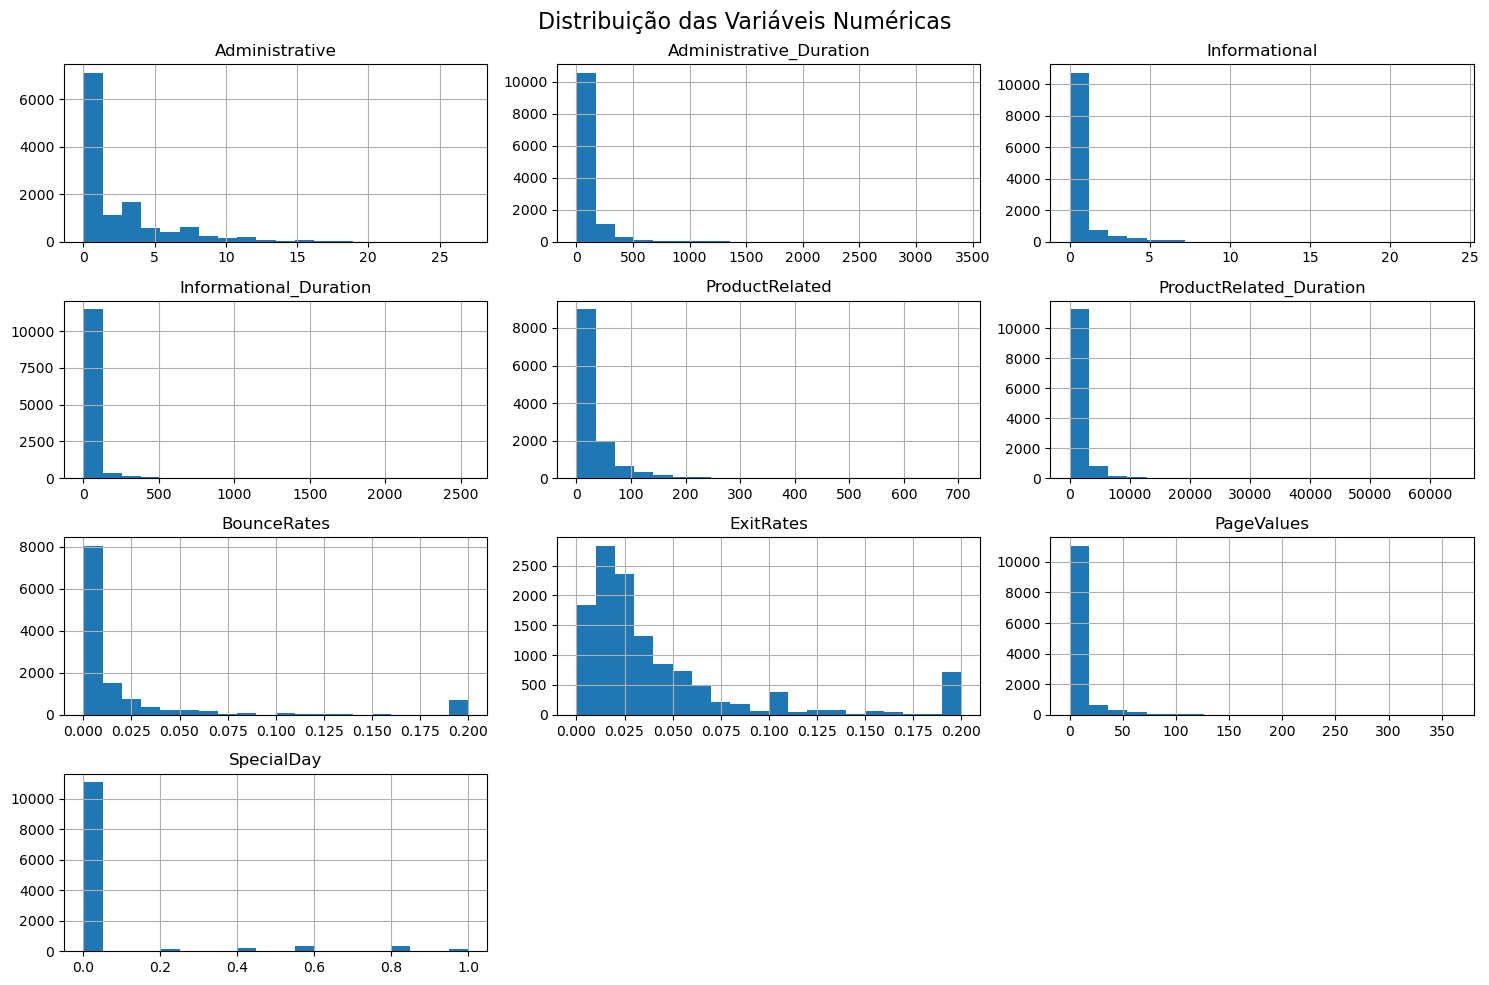

In [7]:
df[[
    'Administrative', 'Administrative_Duration',
    'Informational', 'Informational_Duration',
    'ProductRelated', 'ProductRelated_Duration',
    'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay'
]].hist(bins=20, figsize=(15,10))
plt.suptitle('Distribuição das Variáveis Numéricas', fontsize=16)
plt.tight_layout()
plt.show()


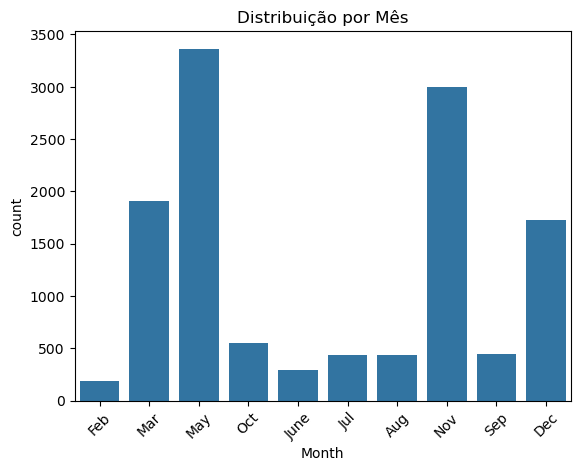

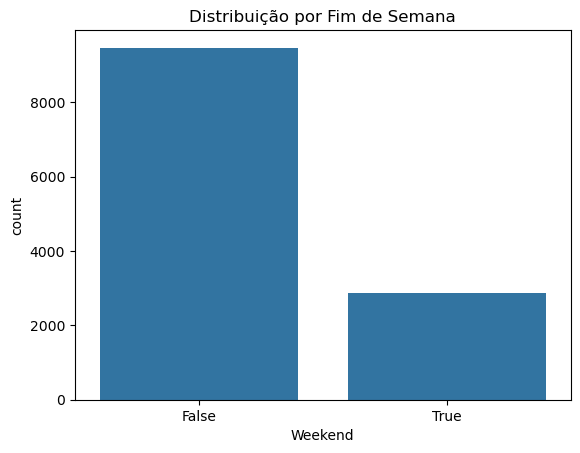

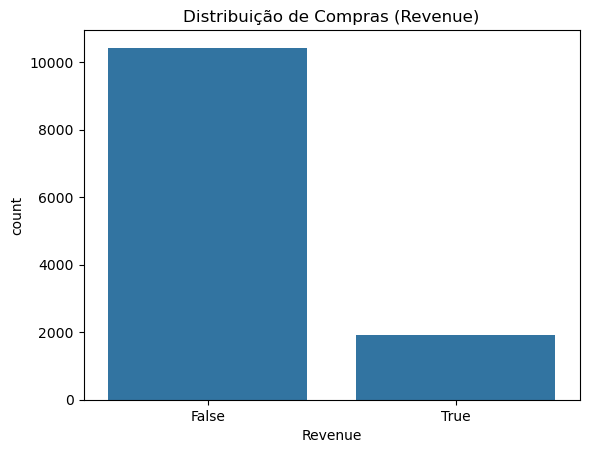

In [8]:
sns.countplot(data=df, x='Month')
plt.title('Distribuição por Mês')
plt.xticks(rotation=45)
plt.show()

sns.countplot(data=df, x='Weekend')
plt.title('Distribuição por Fim de Semana')
plt.show()

sns.countplot(data=df, x='Revenue')
plt.title('Distribuição de Compras (Revenue)')
plt.show()


In [9]:
df['Weekend'] = df['Weekend'].astype(int)
df['Revenue'] = df['Revenue'].astype(int)
df['Month'] = df['Month'].astype('category').cat.codes

## Variáveis de agrupamento

Liste as variáveis que você vai querer utilizar. Essa é uma atividade importante do projeto, e tipicamente não a recebemos pronta. Não há resposta pronta ou correta, mas apenas critérios e a sua decisão. Os critérios são os seguintes:

- Selecione para o agrupamento variáveis que descrevam o padrão de navegação na sessão.
- Selecione variáveis que indiquem a característica da data.
- Não se esqueça de que você vai precisar realizar um tratamento especial para variáveis qualitativas.
- Trate adequadamente valores faltantes.

In [10]:
variaveis_agrupamento = [
    'Administrative', 'Administrative_Duration',
    'Informational', 'Informational_Duration',
    'ProductRelated', 'ProductRelated_Duration',
    'BounceRates', 'ExitRates', 'PageValues',
    'SpecialDay', 'Month', 'Weekend'
]


In [13]:
df_cluster = df[variaveis_agrupamento].copy()

df_cluster['Month'] = df_cluster['Month'].astype('category').cat.codes

df_cluster['Weekend'] = df_cluster['Weekend'].astype(int)

scaler = StandardScaler()
df_cluster_scaled = scaler.fit_transform(df_cluster)

df_cluster_scaled = pd.DataFrame(df_cluster_scaled, columns=df_cluster.columns)

print(df_cluster_scaled.head())

   Administrative  Administrative_Duration  Informational  \
0       -0.696993                -0.457191      -0.396478   
1       -0.696993                -0.457191      -0.396478   
2       -0.696993                -0.457191      -0.396478   
3       -0.696993                -0.457191      -0.396478   
4       -0.696993                -0.457191      -0.396478   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0               -0.244931       -0.691003                -0.624348   
1               -0.244931       -0.668518                -0.590903   
2               -0.244931       -0.691003                -0.624348   
3               -0.244931       -0.668518                -0.622954   
4               -0.244931       -0.488636                -0.296430   

   BounceRates  ExitRates  PageValues  SpecialDay     Month   Weekend  
0     3.667189   3.229316   -0.317178   -0.308821 -1.334959 -0.550552  
1    -0.457683   1.171473   -0.317178   -0.308821 -1.334959 -0.55055

## Número de grupos

Nesta atividade vamos adotar uma abordagem bem pragmática e avaliar agrupamentos hierárquicos com 3 e 4 grupos, por estarem bem alinhados com uma expectativa e estratégia do diretor da empresa. 

*Atenção*: Cuidado se quiser fazer o dendrograma, pois com muitas observações ele pode ser mais complicado de fazer, e dependendo de como for o comando, ele pode travar o *kernell* do seu python.

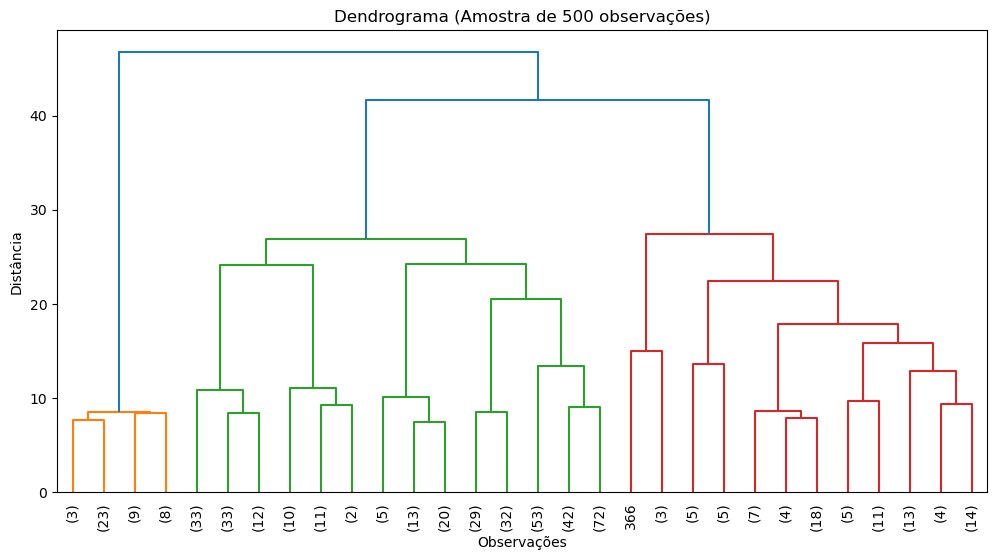

In [15]:
df_sample = df_cluster_scaled.sample(n=500, random_state=42)

Z = linkage(df_sample, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=10.)
plt.title("Dendrograma (Amostra de 500 observações)")
plt.xlabel("Observações")
plt.ylabel("Distância")
plt.show()


In [16]:
Z_full = linkage(df_cluster_scaled, method='ward')

df_cluster_scaled['cluster_3'] = fcluster(Z_full, 3, criterion='maxclust')
df_cluster_scaled['cluster_4'] = fcluster(Z_full, 4, criterion='maxclust')

print("Distribuição com 3 grupos:")
print(df_cluster_scaled['cluster_3'].value_counts())

print("\nDistribuição com 4 grupos:")
print(df_cluster_scaled['cluster_4'].value_counts())

Distribuição com 3 grupos:
cluster_3
3    10591
2     1078
1      661
Name: count, dtype: int64

Distribuição com 4 grupos:
cluster_4
4    9394
3    1197
2    1078
1     661
Name: count, dtype: int64


## Avaliação dos grupos

Construa os agrupamentos com a técnica adequada que vimos em aula. Não se esqueça de tratar variáveis qualitativas, padronizar escalas das quantitativas, tratar valores faltantes e utilizar a distância correta.

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final. 
- Se puder, sugira nomes para os grupos.

In [17]:
print("\n--- MÉDIAS POR GRUPO (3 grupos) ---")
df_3 = df_cluster_scaled.copy()
df_3['cluster'] = df_3['cluster_3']
media_3 = df_3.groupby('cluster').mean()
print(media_3)

print("\n--- MÉDIAS POR GRUPO (4 grupos) ---")
df_4 = df_cluster_scaled.copy()
df_4['cluster'] = df_4['cluster_4']
media_4 = df_4.groupby('cluster').mean()
print(media_4)



--- MÉDIAS POR GRUPO (3 grupos) ---
         Administrative  Administrative_Duration  Informational  \
cluster                                                           
1             -0.691072                -0.457191      -0.390522   
2              1.218255                 1.469156       2.004241   
3             -0.080869                -0.121003      -0.179628   

         Informational_Duration  ProductRelated  ProductRelated_Duration  \
cluster                                                                    
1                     -0.244931       -0.676036                -0.616597   
2                      1.803170        1.186928                 1.182177   
3                     -0.168248       -0.078619                -0.081845   

         BounceRates  ExitRates  PageValues  SpecialDay     Month   Weekend  \
cluster                                                                       
1           3.578048   3.171978   -0.317178   -0.308821 -0.175151 -0.034916   
2        

In [ ]:
# Com base na análise das médias dos grupos e nas características observadas em cada perfil, a melhor escolha de agrupamento final é a opção com 4 grupos.
# 1: Visitantes Casuais 2: Potenciais Compradores 3: Caçadores de Promoções 4: Visitantes Regulares

## Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*). 
- Qual grupo possui clientes mais propensos à compra?

In [ ]:
# Grupo 2